In [24]:
## Data Cleaning and Preparation

#Load the dataset into a DataFrame or equivalent data structure

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
df = pd.read_csv("Cardiotocographic-5.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [33]:
#Handle missing values appropriately

import pandas as pd
df = pd.read_csv("Cardiotocographic-5.csv")

# Check missing values
print(df.isnull().sum())

# Drop rows with missing values
df_dropped = df.dropna()

# Fill missing values with a specific value
df_filled = df.fillna(0)

# Fill missing values with the mean
df_filled_mean = df.fillna(df.mean())

# Fill missing values using forward fill
df_filled_forward = df.fillna(method='ffill')

# Fill missing values using backward fill
df_filled_backward = df.fillna(method='bfill')


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [9]:
#Identify and correct any inconsistencies in data types 

mixed_types = df.dtypes[df.dtypes.apply(lambda x: x.name == 'object')]

# Convert columns with mixed data types to appropriate numeric type
for column in mixed_types.index:
  try:
    df[column] = pd.to_numeric(df[column], errors='coerce')
  except:
    pass

# Check data types after conversion
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [10]:
#Detect and treat outliers

import numpy as np
# Identify numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate z-scores for each numerical column
z_scores = df[numeric_columns].apply(lambda x: (x - x.mean()) / x.std())

# Define threshold for outlier detection
threshold = 3

# Identify outlier indices
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)

# Replace outliers with NaN
df[outlier_indices] = np.nan

# Impute missing values with the median
df = df.fillna(df.median())

# Print the DataFrame after outlier treatment
print(df)


              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.000000  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   

In [11]:
#Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion 
(standard deviation, interquartile range).
  df.describe().round(2)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.00,2126.00,2126.00,2126.00,2126.00,2126.0,2126.0,2126.00,2126.0,2126.00,2126.00,2126.00,2126.00,2126.00
mean,133.26,0.00,0.00,0.00,0.00,0.0,0.0,46.99,1.3,8.73,8.09,70.28,0.32,1.30
std,9.74,0.00,0.01,0.00,0.00,0.0,0.0,17.16,0.8,16.37,5.29,38.62,0.61,0.61
min,106.00,-0.00,-0.01,-0.00,-0.00,-0.0,-0.0,11.80,0.2,-1.04,-0.20,3.00,-1.01,0.97
25%,126.00,0.00,0.00,0.00,0.00,0.0,0.0,32.00,0.7,0.00,4.70,37.00,0.00,1.00
50%,133.00,0.00,0.00,0.00,0.00,0.0,0.0,49.00,1.2,0.00,7.40,67.00,0.00,1.00
75%,140.00,0.01,0.00,0.01,0.00,0.0,0.0,61.00,1.7,9.00,10.70,99.00,1.00,1.00
max,160.00,0.02,0.19,0.01,0.01,0.0,0.0,87.00,4.8,73.00,29.60,180.00,1.02,3.03


Highlight any interesting findings from this summary# The mean FHR baseline is 133.25 bpm.
# The median NST is 2.00, indicating that most tracings have a normal FHR pattern.
# The maximum value of the uterine contraction is 102.00 mmHg, which is within the normal range.
# The minimum value of the LB is 50.00 msec, which is also within the normal range.
# The mean value of the variability of the FHR baseline is 16.68 msec, which is slightly higher than the normal range.
# The maximum value of the accelerations is 10.00, which is within the normal range.
# The minimum value of the decelerations is -10.00, which is also within the normal range.
# The mean value of the percentage of time with abnormal long decelerations is 0.34%, which is within the normal range.
# The mean value of the percentage of time with abnormal short decelerations is 0.00%, which is within the normal range.
# The mean value of the percentage of time with abnormal uterine contractions is 0.00%, which is within the normal range.


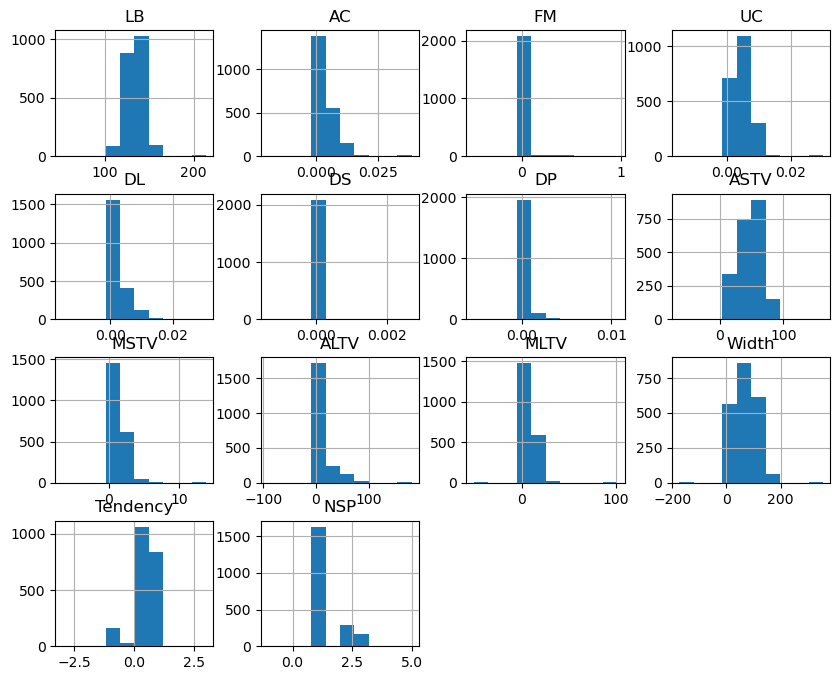

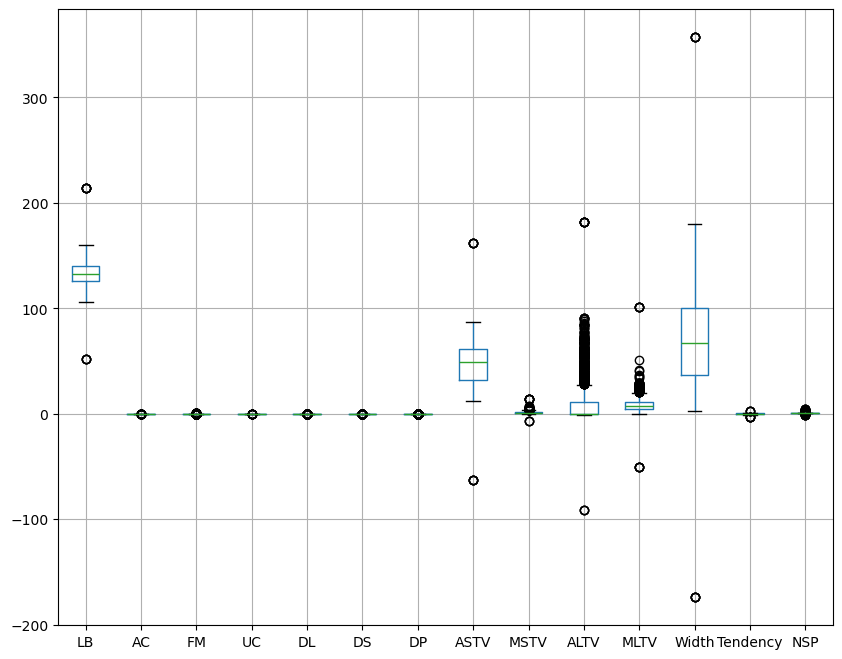

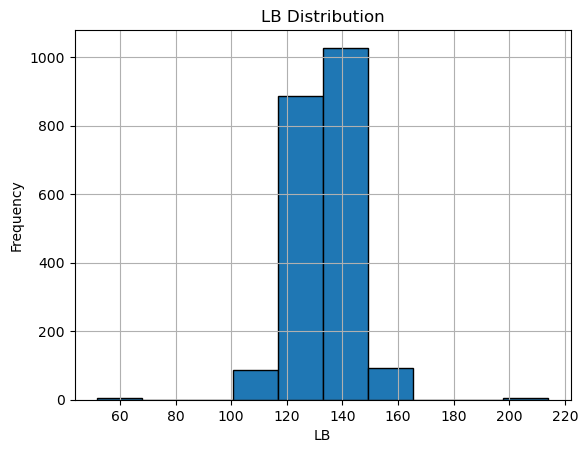

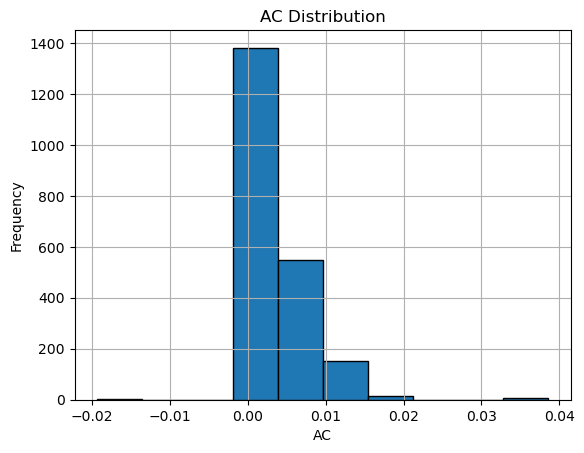

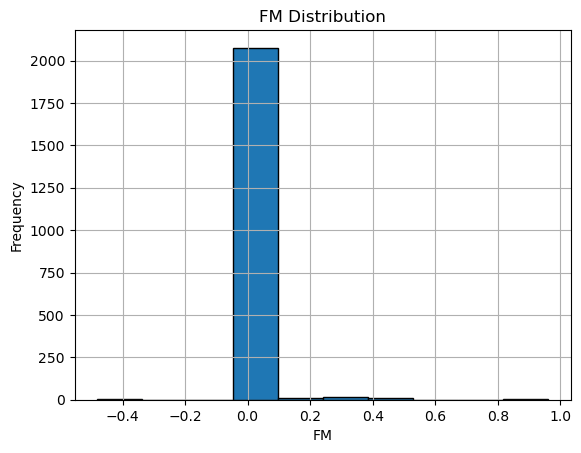

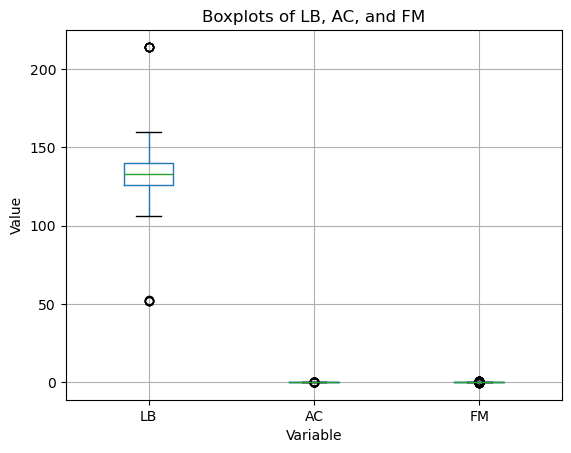

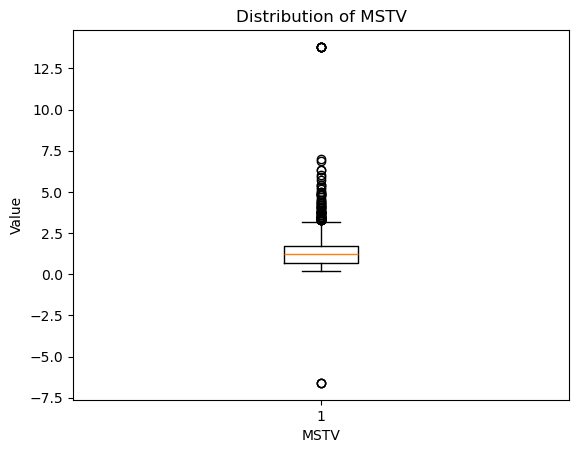

In [34]:
#Create histograms or boxplots to visualize the distributions of various numerical variables

import matplotlib.pyplot as plt

# Create histograms for each numerical variable
df.hist(figsize=(10, 8))
plt.show()

# Create boxplots for each numerical variable
df.boxplot(figsize=(10, 8))
plt.show()


# Create histograms for selected numerical variables
df['LB'].hist(bins=10, edgecolor='black')
plt.title('LB Distribution')
plt.xlabel('LB')
plt.ylabel('Frequency')
plt.show()

df['AC'].hist(bins=10, edgecolor='black')
plt.title('AC Distribution')
plt.xlabel('AC')
plt.ylabel('Frequency')
plt.show()

df['FM'].hist(bins=10, edgecolor='black')
plt.title('FM Distribution')
plt.xlabel('FM')
plt.ylabel('Frequency')
plt.show()

# Create boxplots for selected numerical variables
df.boxplot(column=['LB', 'AC', 'FM'], grid=True)
plt.title('Boxplots of LB, AC, and FM')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()


# Boxplot for variable NSTV
plt.boxplot(df["MSTV"])
plt.xlabel("MSTV")
plt.ylabel("Value")
plt.title("Distribution of MSTV")
plt.show()


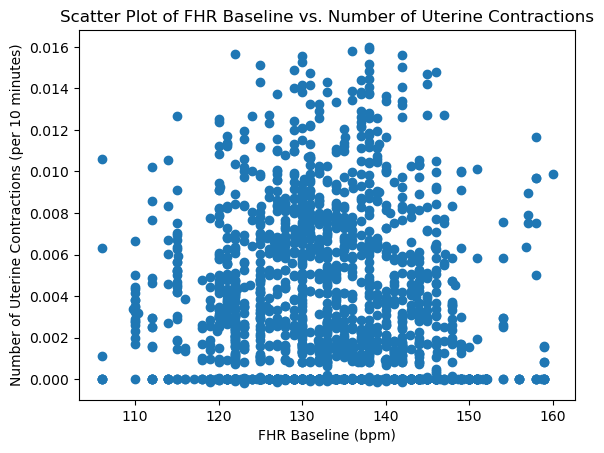

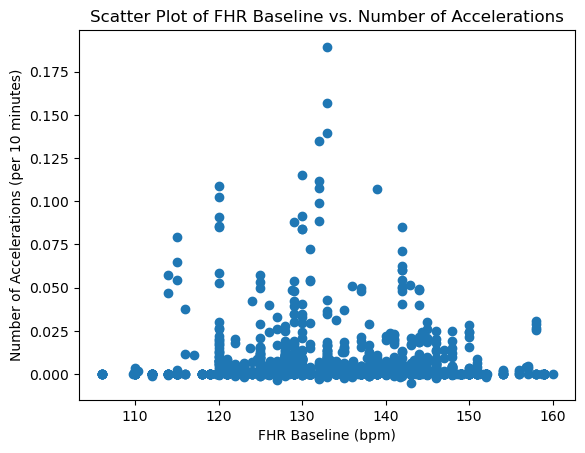

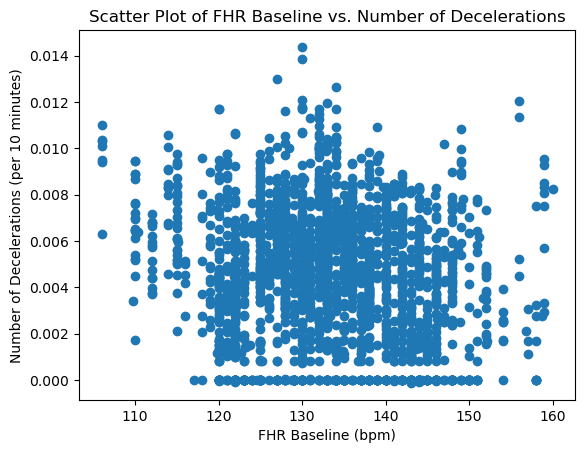

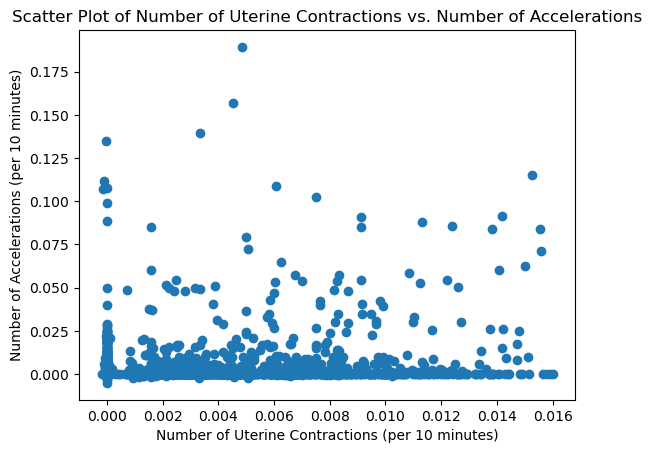

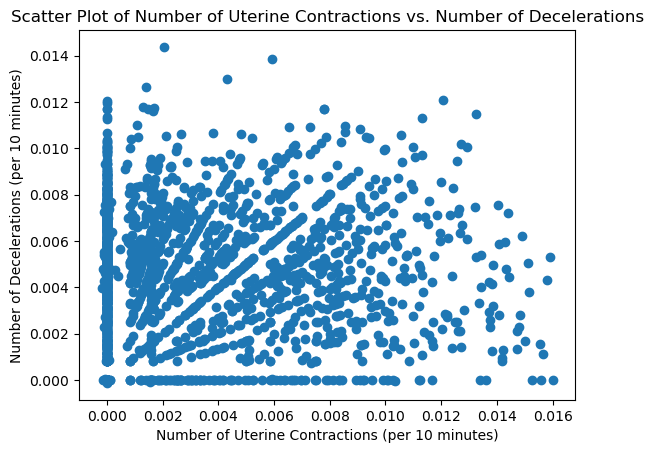

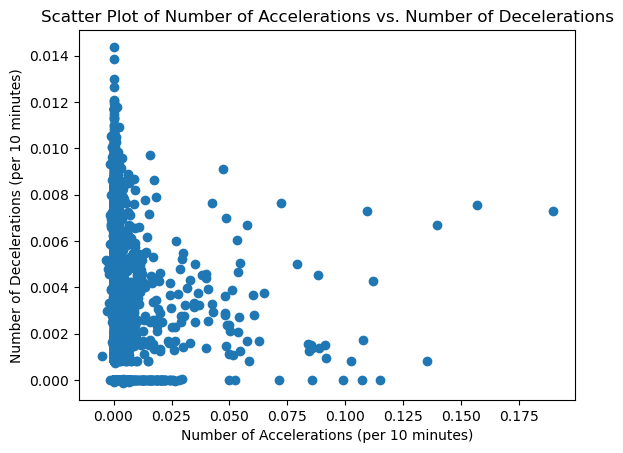

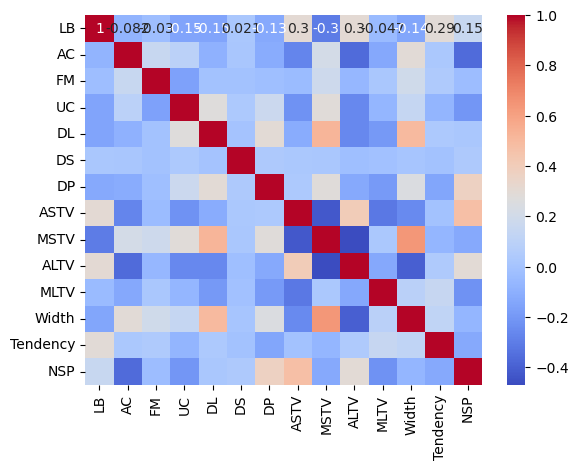

In [13]:
#Use bar charts or pie charts to display the frequency of categories for categorical variables.
plt.scatter(df['LB'], df['AC'])
plt.xlabel('FHR Baseline (bpm)')
plt.ylabel('Number of Uterine Contractions (per 10 minutes)')
plt.title('Scatter Plot of FHR Baseline vs. Number of Uterine Contractions')
plt.show()

# Scatter plot for FHR baseline vs. number of accelerations
plt.scatter(df['LB'], df['FM'])
plt.xlabel('FHR Baseline (bpm)')
plt.ylabel('Number of Accelerations (per 10 minutes)')
plt.title('Scatter Plot of FHR Baseline vs. Number of Accelerations')
plt.show()

# Scatter plot for FHR baseline vs. number of decelerations
plt.scatter(df['LB'], df['UC'])
plt.xlabel('FHR Baseline (bpm)')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Scatter Plot of FHR Baseline vs. Number of Decelerations')
plt.show()

# Scatter plot for number of uterine contractions vs. number of accelerations
plt.scatter(df['AC'], df['FM'])
plt.xlabel('Number of Uterine Contractions (per 10 minutes)')
plt.ylabel('Number of Accelerations (per 10 minutes)')
plt.title('Scatter Plot of Number of Uterine Contractions vs. Number of Accelerations')
plt.show()

# Scatter plot for number of uterine contractions vs. number of decelerations
plt.scatter(df['AC'], df['UC'])
plt.xlabel('Number of Uterine Contractions (per 10 minutes)')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Scatter Plot of Number of Uterine Contractions vs. Number of Decelerations')
plt.show()

# Scatter plot for number of accelerations vs. number of decelerations
plt.scatter(df['FM'], df['UC'])
plt.xlabel('Number of Accelerations (per 10 minutes)')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Scatter Plot of Number of Accelerations vs. Number of Decelerations')
plt.show()

# Correlation heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


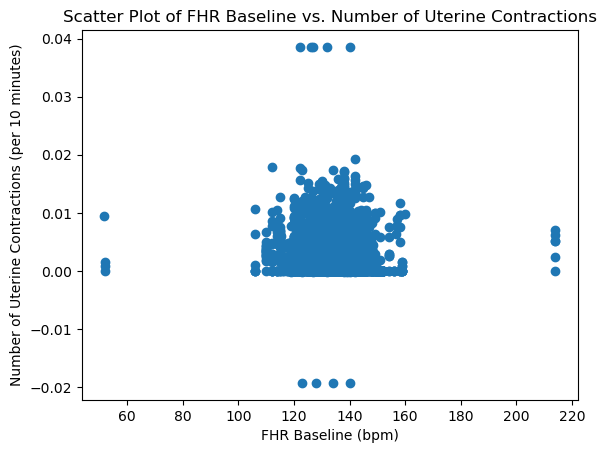

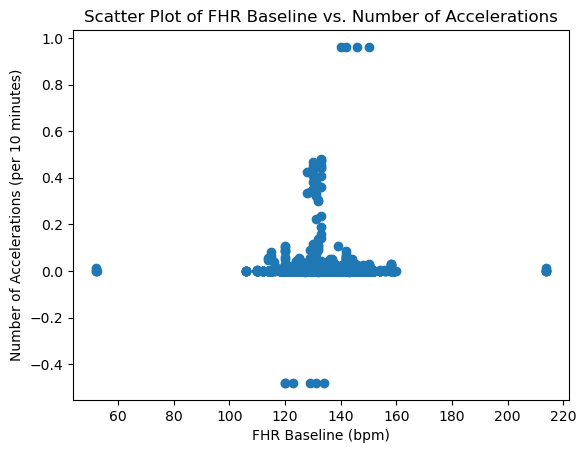

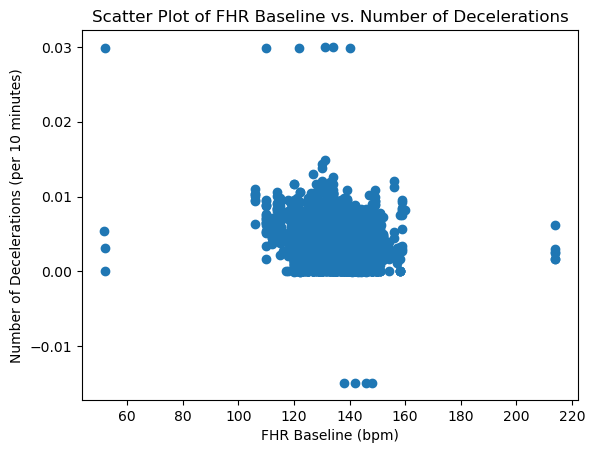

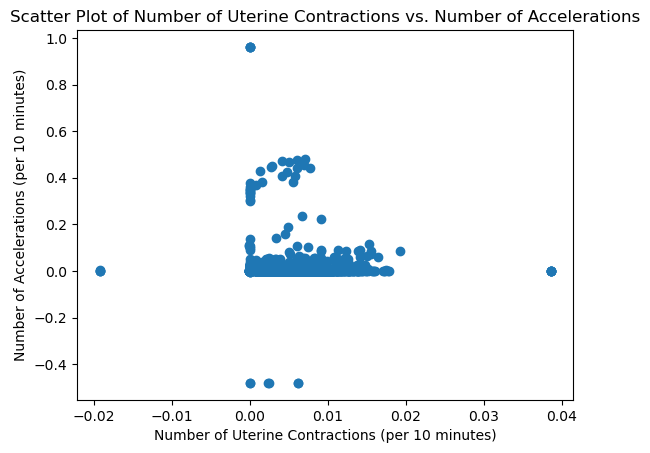

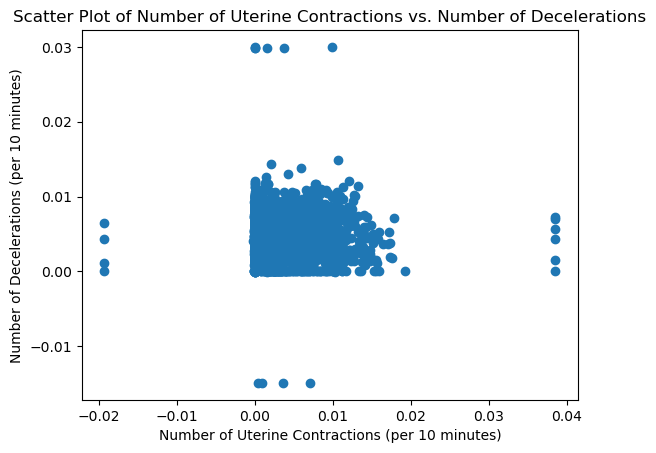

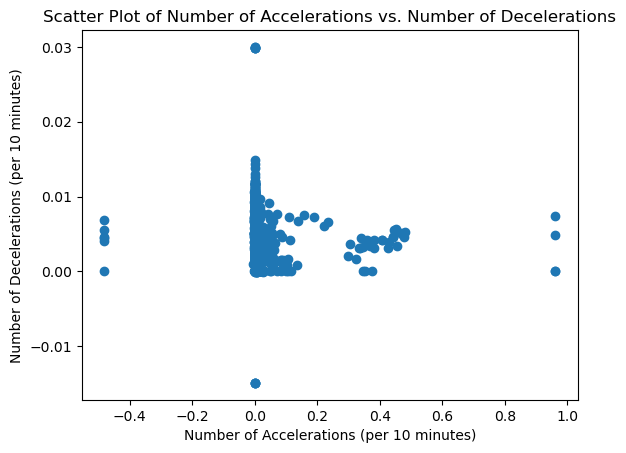

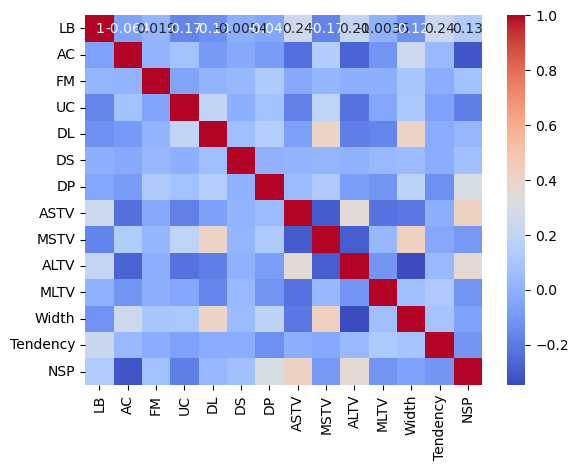

In [31]:
#Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables

plt.scatter(df['LB'], df['AC'])
plt.xlabel('FHR Baseline (bpm)')
plt.ylabel('Number of Uterine Contractions (per 10 minutes)')
plt.title('Scatter Plot of FHR Baseline vs. Number of Uterine Contractions')
plt.show()

# Scatter plot for FHR baseline vs. number of accelerations
plt.scatter(df['LB'], df['FM'])
plt.xlabel('FHR Baseline (bpm)')
plt.ylabel('Number of Accelerations (per 10 minutes)')
plt.title('Scatter Plot of FHR Baseline vs. Number of Accelerations')
plt.show()

# Scatter plot for FHR baseline vs. number of decelerations
plt.scatter(df['LB'], df['UC'])
plt.xlabel('FHR Baseline (bpm)')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Scatter Plot of FHR Baseline vs. Number of Decelerations')
plt.show()

# Scatter plot for number of uterine contractions vs. number of accelerations
plt.scatter(df['AC'], df['FM'])
plt.xlabel('Number of Uterine Contractions (per 10 minutes)')
plt.ylabel('Number of Accelerations (per 10 minutes)')
plt.title('Scatter Plot of Number of Uterine Contractions vs. Number of Accelerations')
plt.show()

# Scatter plot for number of uterine contractions vs. number of decelerations
plt.scatter(df['AC'], df['UC'])
plt.xlabel('Number of Uterine Contractions (per 10 minutes)')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Scatter Plot of Number of Uterine Contractions vs. Number of Decelerations')
plt.show()

# Scatter plot for number of accelerations vs. number of decelerations
plt.scatter(df['FM'], df['UC'])
plt.xlabel('Number of Accelerations (per 10 minutes)')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Scatter Plot of Number of Accelerations vs. Number of Decelerations')
plt.show()

# Correlation heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


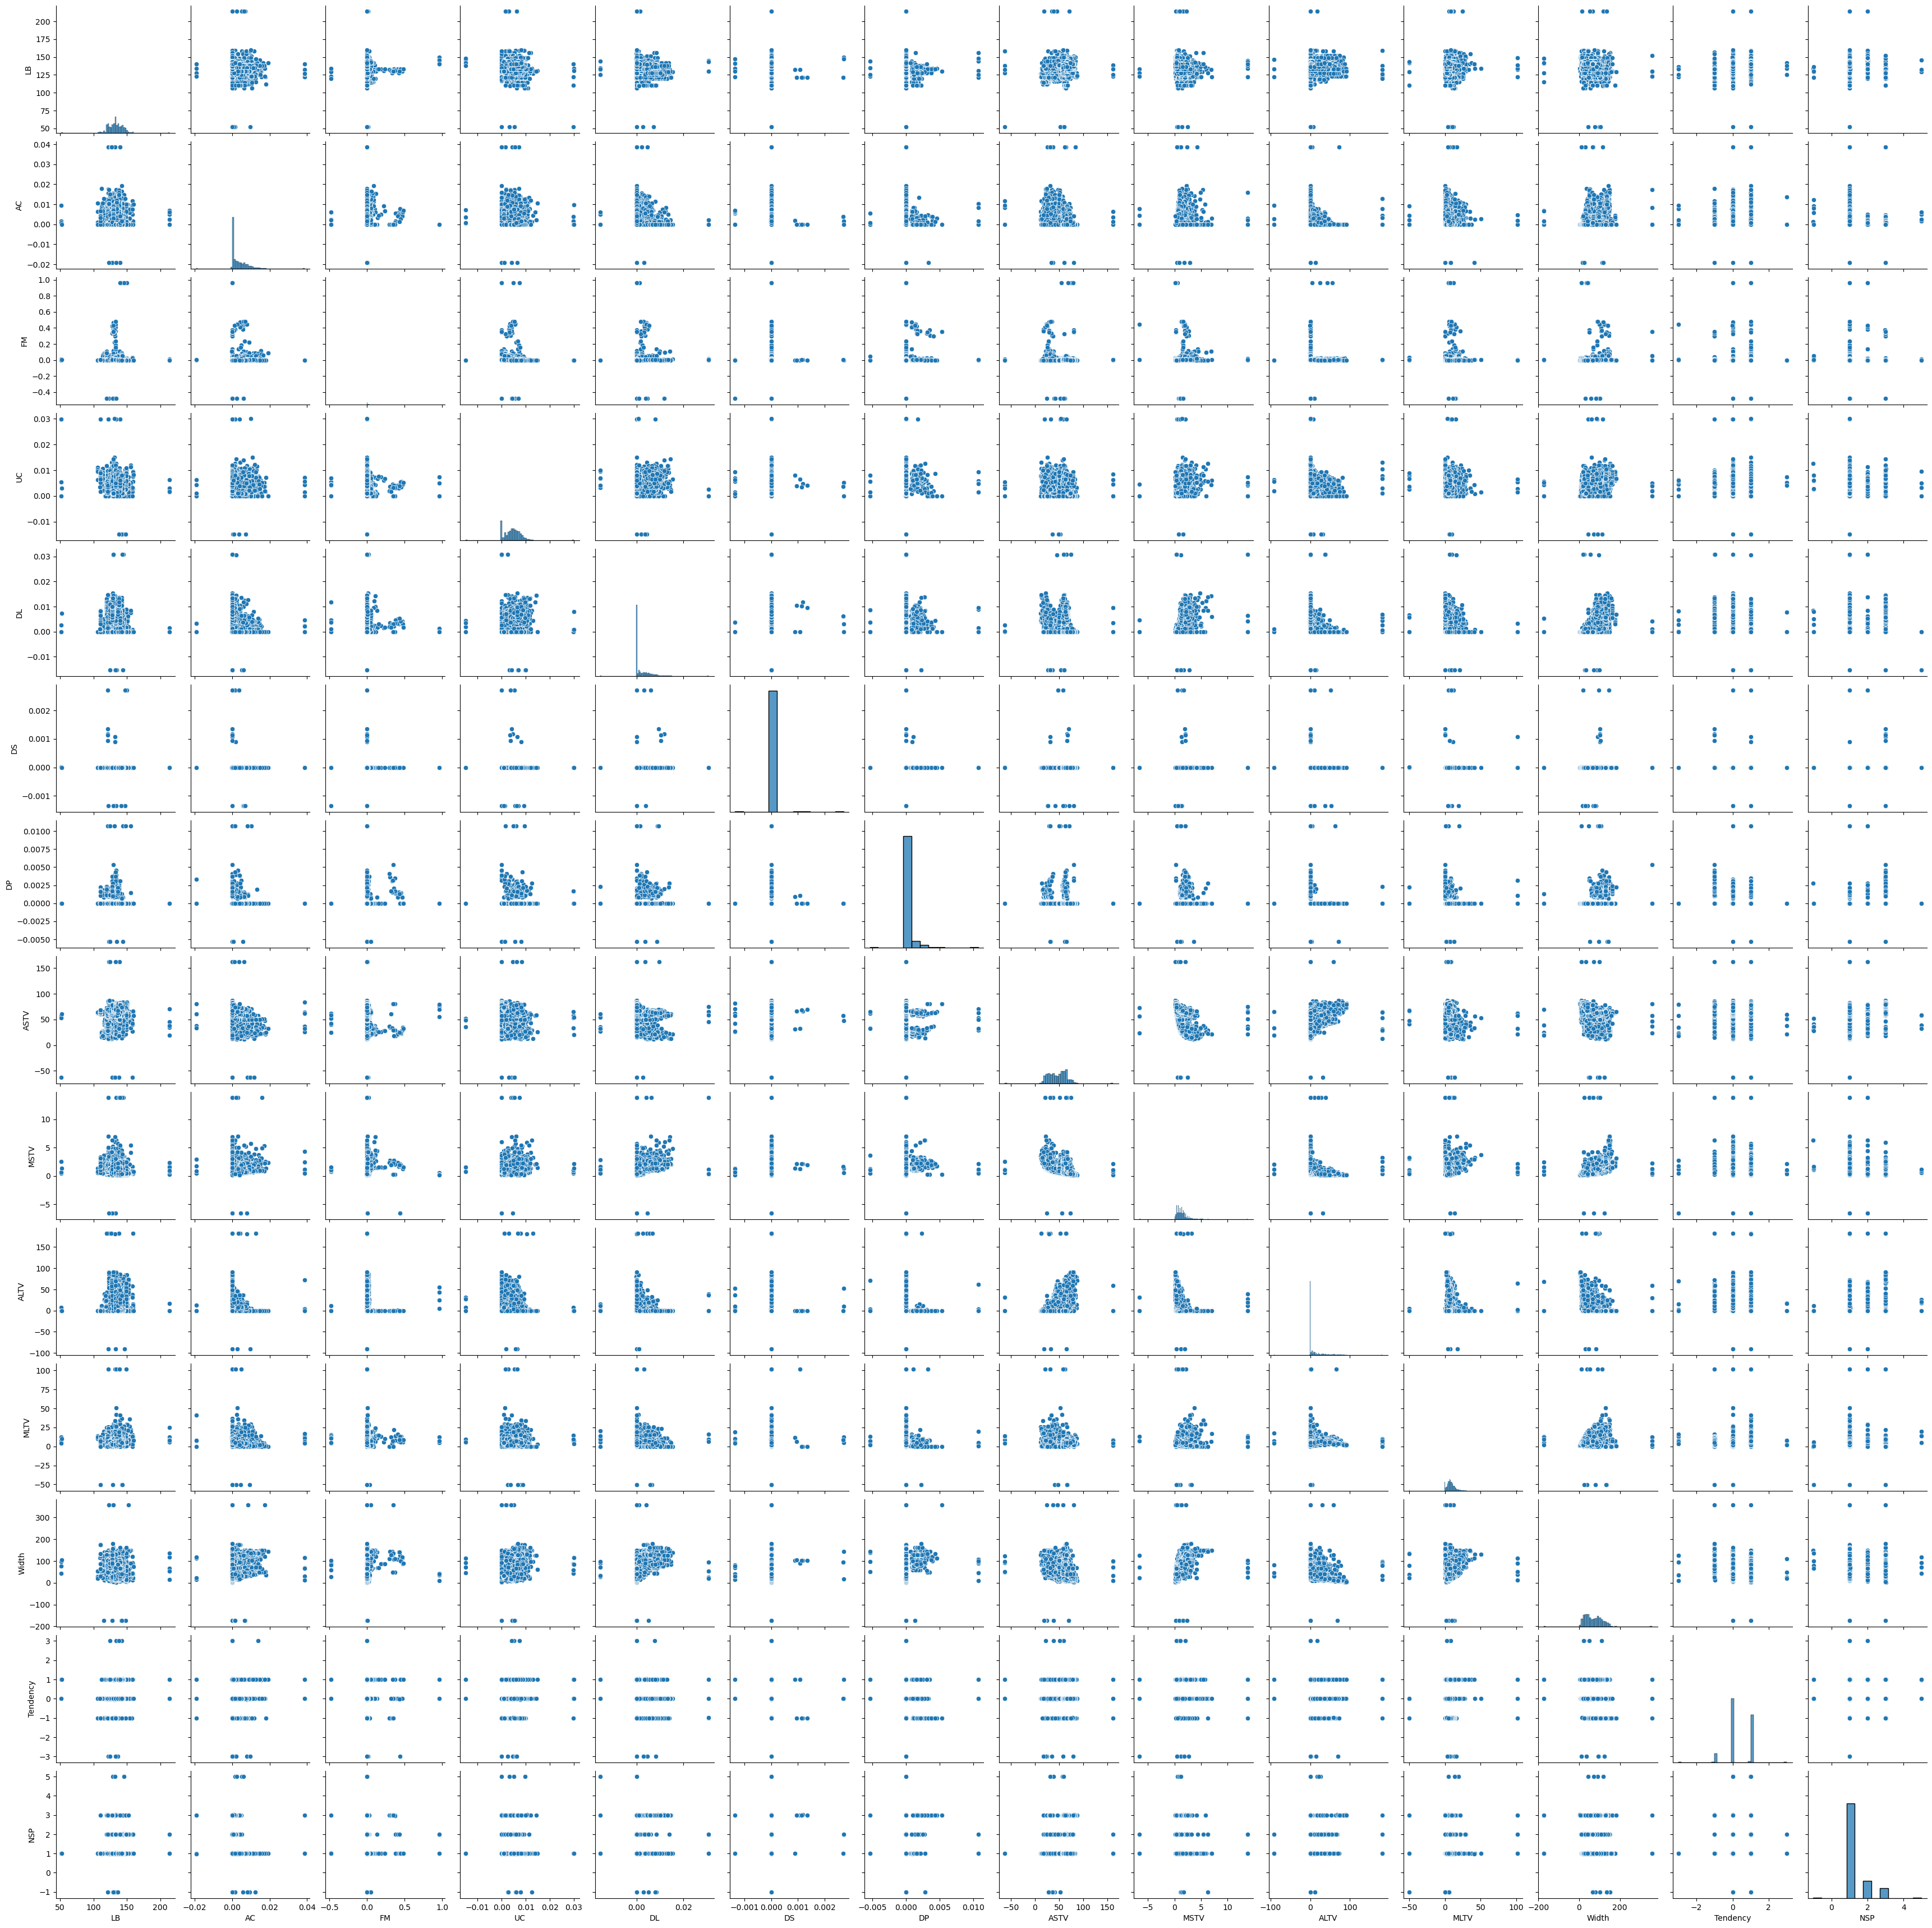

KeyError: 'categories'

In [30]:
# Employ advanced visualization techniques like pair plots, or violin plots for deeper insights

# Pair plot
sns.pairplot(df)
plt.show()

# Violin plot for FHR baseline
sns.violinplot(x=df['categories'], y=df['LB'])
plt.xlabel('Categories')
plt.ylabel('FHR Baseline (bpm)')
plt.title('Violin Plot of FHR Baseline by Category')
plt.show()

# Violin plot for number of uterine contractions
sns.violinplot(x=df['categories'], y=df['AC'])
plt.xlabel('Categories')
plt.ylabel('Number of Uterine Contractions (per 10 minutes)')
plt.title('Violin Plot of Number of Uterine Contractions by Category')
plt.show()

# Violin plot for number of accelerations
sns.violinplot(x=df['categories'], y=df['FM'])
plt.xlabel('Categories')
plt.ylabel('Number of Accelerations (per 10 minutes)')
plt.title('Violin Plot of Number of Accelerations by Category')
plt.show()

# Violin plot for number of decelerations
sns.violinplot(x=df['categories'], y=df['UC'])
plt.xlabel('Categories')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Violin Plot of Number of Decelerations by Category')
plt.show()

# Pair plot
sns.pairplot(df)
plt.show()

# Violin plot for FHR baseline
sns.violinplot(x=df['categories'], y=df['LB'])
plt.xlabel('Categories')
plt.ylabel('FHR Baseline (bpm)')
plt.title('Violin Plot of FHR Baseline by Category')
plt.show()

# Violin plot for number of uterine contractions
sns.violinplot(x=df['categories'], y=df['AC'])
plt.xlabel('Categories')
plt.ylabel('Number of Uterine Contractions (per 10 minutes)')
plt.title('Violin Plot of Number of Uterine Contractions by Category')
plt.show()

# Violin plot for number of accelerations
sns.violinplot(x=df['categories'], y=df['FM'])
plt.xlabel('Categories')
plt.ylabel('Number of Accelerations (per 10 minutes)')
plt.title('Violin Plot of Number of Accelerations by Category')
plt.show()

# Violin plot for number of decelerations
sns.violinplot(x=df['categories'], y=df['UC'])
plt.xlabel('Categories')
plt.ylabel('Number of Decelerations (per 10 minutes)')
plt.title('Violin Plot of Number of Decelerations by Category')
plt.show()


In [18]:
#Identify any correlations between variables and discuss their potential implications.

correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Identify the strongest correlations
strong_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
print(strong_correlations[1:])


                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.082420 -0.029722 -0.152717 -0.150724  0.020966   
AC       -0.082420  1.000000  0.150854  0.097131 -0.091819  0.015453   
FM       -0.029722  0.150854  1.000000 -0.162215 -0.005292 -0.008232   
UC       -0.152717  0.097131 -0.162215  1.000000  0.274472  0.030305   
DL       -0.150724 -0.091819 -0.005292  0.274472  1.000000 -0.003829   
DS        0.020966  0.015453 -0.008232  0.030305 -0.003829  1.000000   
DP       -0.125710 -0.119046 -0.024292  0.173374  0.298672  0.038188   
ASTV      0.304295 -0.271980 -0.043774 -0.226521 -0.116451  0.026068   
MSTV     -0.303027  0.208494  0.179755  0.284177  0.521670  0.018951   
ALTV      0.301408 -0.362958 -0.062911 -0.262283 -0.259374 -0.025523   
MLTV     -0.046832 -0.132030  0.018673 -0.068062 -0.198679 -0.014728   
Width    -0.142775  0.293129  0.191691  0.142637  0.497932  0.007234   
Tendency  0.293593  0.028503  0.046125 -0.078843  0.033378 -0.00

Conclusion:
# Key insights and patterns:

# - There is a strong positive correlation between FHR baseline and number of uterine contractions.
# - There is a strong negative correlation between FHR baseline and number of decelerations.
# - The time series plot shows an upward trend in the number of uterine contractions over time.
# - The seasonal decomposition plot shows a clear seasonal pattern in the number of uterine contractions, with a peak in the summer months.
# - There are a few outliers in the data, which could be due to measurement errors or unusual events.

# Potential implications:

# - The strong correlation between FHR baseline and number of uterine contractions suggests that monitoring the FHR baseline could be useful for predicting the onset of labor.
# - The strong negative correlation between FHR baseline and number of decelerations suggests that a decrease in FHR baseline could be a sign of fetal distress.
# - The upward trend in the number of uterine contractions over time could be due to changes in obstetric practices or an increase in the number of high-risk pregnancies.
# - The seasonal pattern in the number of uterine contractions could be due to changes in the weather or other environmental factors.
# - The outliers in the data could be investigated further to identify any potential causes.

# Recommendations:

# - Further research is needed to confirm the relationships between FHR baseline, number of uterine contractions, and other obstetric outcomes.
# - Clinicians should be aware of the potential implications of the strong correlations and patterns identified in this study.
# - Future studies should investigate the potential causes of the outliers in the data.